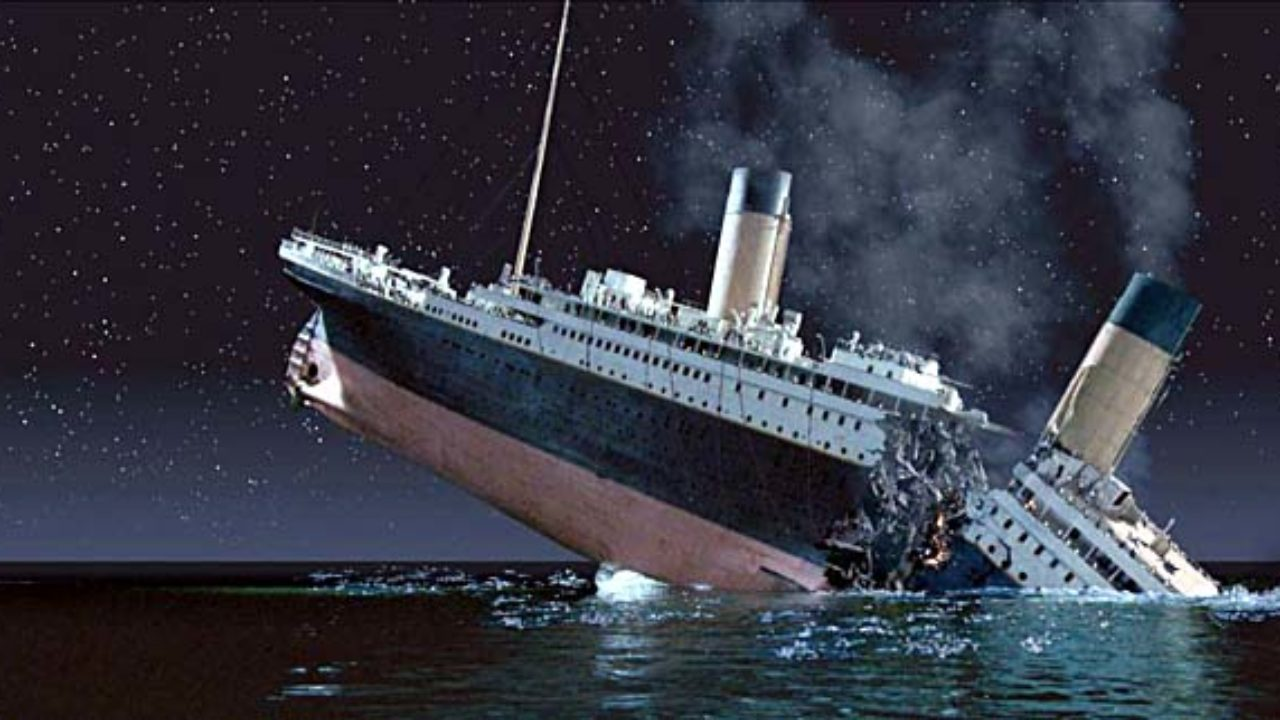

### Jayesh Kumar
### jayeshkumar8660@gmail.com
### 8660886760
### Titanic survivers predicting using Logistic Regression.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### DATA CLEANING

### As we can see from the above DataFrame Alive is redundent column of survived,who is a redundent column of sex class is redundent of pclass and embarked is redundent of embark_town.
### So we can drop who,alive,class,embarked

In [4]:
df.drop(columns=['who','alive','embarked','class'],inplace=True)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,NaN,Southampton,True


### Search for NaN values and handle them

In [7]:
df.shape

(891, 11)

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

### Drop duplicate values. 

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
adult_male       0
deck           582
embark_town      2
alone            0
dtype: int64

### looks like we removed some duplicate values

In [10]:
df.shape

(784, 11)

### out of 784 rows 582 row values is NaN in deck column. We cannot extract usefull information from that column .We beed to drop that column 

In [11]:
df.drop(columns=['deck'],inplace=True)

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
alone            0
dtype: int64

### Age has 106 NaN values.But we cannot drop that column we will lose information. Lets fill these NaN values.
### We can fill these NaN values by taking mean,median or filling the previous age value or next age value.
### For now i will fill NaN values by taking median of age column.

In [24]:
df['age']=df['age'].fillna(df['age'].median())

In [25]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    2
alone          0
dtype: int64

### embark_town has 2 NaN values we can drop those row,no much harm is done.

In [26]:
df.dropna(axis=0,inplace=True)

In [27]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 890
Data columns (total 10 columns):
survived       782 non-null int64
pclass         782 non-null int64
sex            782 non-null object
age            782 non-null float64
sibsp          782 non-null int64
parch          782 non-null int64
fare           782 non-null float64
adult_male     782 non-null bool
embark_town    782 non-null object
alone          782 non-null bool
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 56.5+ KB


### Age column is of float type.lets convert to int type.

In [32]:
df['age']=df['age'].astype('int64')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 890
Data columns (total 10 columns):
survived       782 non-null int64
pclass         782 non-null int64
sex            782 non-null object
age            782 non-null int64
sibsp          782 non-null int64
parch          782 non-null int64
fare           782 non-null float64
adult_male     782 non-null bool
embark_town    782 non-null object
alone          782 non-null bool
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 56.5+ KB


In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22,1,0,7.2500,True,Southampton,False
1,1,1,female,38,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26,0,0,7.9250,False,Southampton,True
3,1,1,female,35,1,0,53.1000,False,Southampton,False
4,0,3,male,35,0,0,8.0500,True,Southampton,True


### lets perform our analysis

In [37]:
categorical=['survived','pclass','sex','sibsp','parch','adult_male','embark_town','alone']
continous=['age','fare']

### univarite analysis

0    461
1    321
Name: survived, dtype: int64


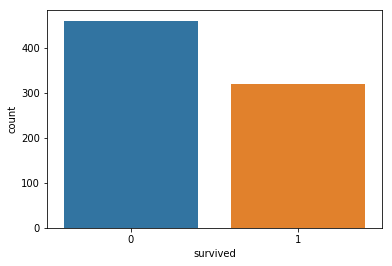

3    405
1    212
2    165
Name: pclass, dtype: int64


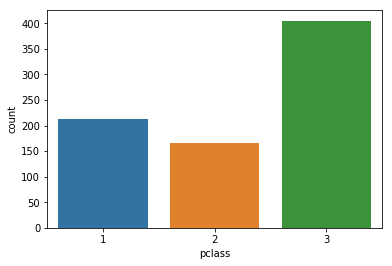

male      491
female    291
Name: sex, dtype: int64


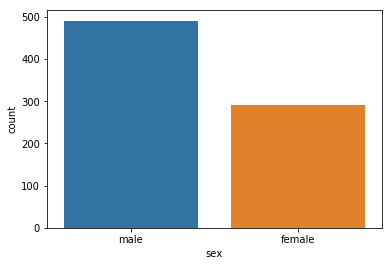

0    515
1    201
2     27
4     18
3     14
5      5
8      2
Name: sibsp, dtype: int64


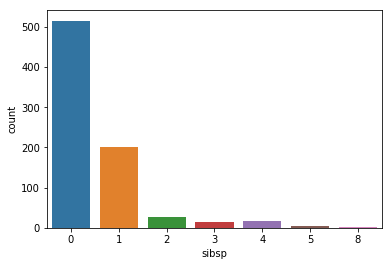

0    578
1    114
2     75
5      5
3      5
4      4
6      1
Name: parch, dtype: int64


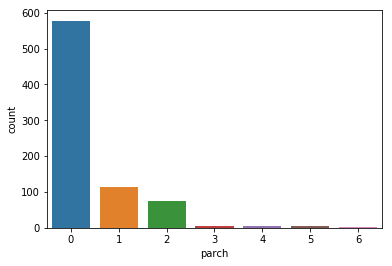

True     451
False    331
Name: adult_male, dtype: int64


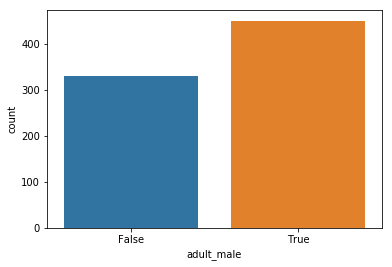

Southampton    568
Cherbourg      155
Queenstown      59
Name: embark_town, dtype: int64


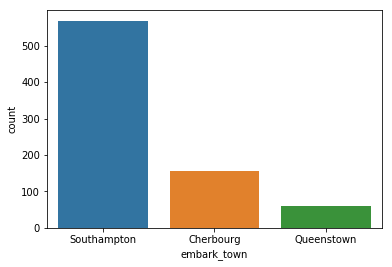

True     444
False    338
Name: alone, dtype: int64


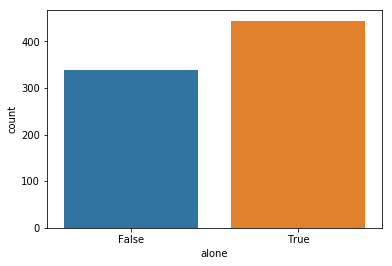

In [39]:
for i in categorical:
    print(df[i].value_counts())
    sb.countplot(x=i,data=df)
    plt.show()

### Figure 1: Out of 782 people 461 died and 321 survived
### Figure 2: More that half of the people where travelling in class 3.212 people in class 1 then 165 in class 2
### Figure 3:491 male and 291 female members where on the board.
### Figure 4:sibsp is number of siblings or spouses ,so there were 515 people without siblings nor spouses    whereas 2 people had 8 siblings.
### Figure 5:parch is Number of Parents/Children, so there were 578 people without parents nor children and we can see that if family size increases number of people decreases.
### Figure 6:From figure 2 we know that there were 491 males. Out of 491 451 where adults,remaining 50 were either kids or old age people.
### Figure 7:many people were from southampton.
### Figure 8:444 people were alone whereas 338 people were with theire family.

count    782.000000
mean      29.598363
std       13.700341
min        0.420000
25%       22.000000
50%       28.250000
75%       36.000000
max       80.000000
Name: age, dtype: float64
0.44051164028935064


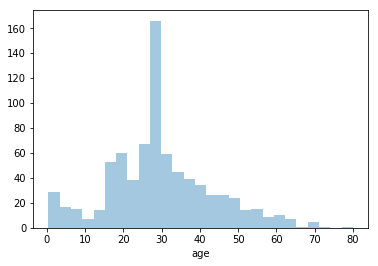

count    782.000000
mean      34.595913
std       52.176458
min        0.000000
25%        8.050000
50%       15.875000
75%       33.375000
max      512.329200
Name: fare, dtype: float64
4.583205969233933


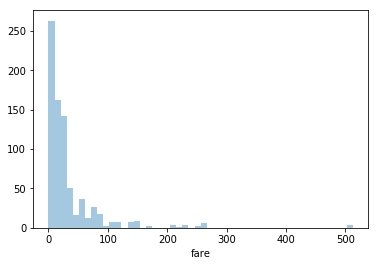

In [17]:
for i in continous:
    print(df[i].describe())b
    
    print(df[i].skew())
    sb.distplot(df[i],kde=False)
    plt.show()

### Figure 1: Around 170 people aged between 25-30. We can also say that very less old people were on the board.
### Figure 2: This graph is highly positive skewed. that means very less people had high passenger fare.

### perform bivaraite analysis
### categorical vs categorical.

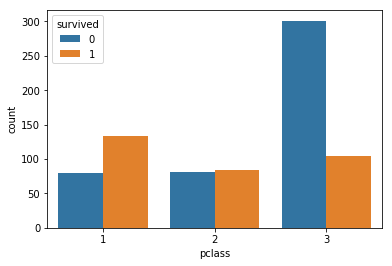

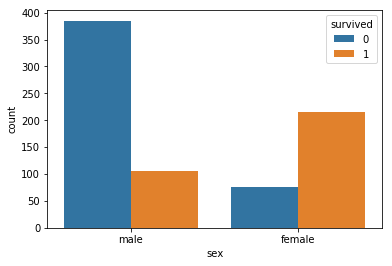

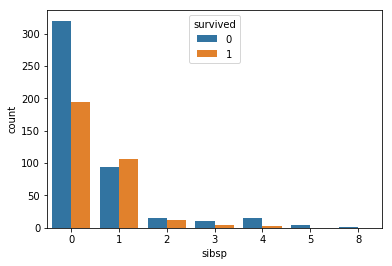

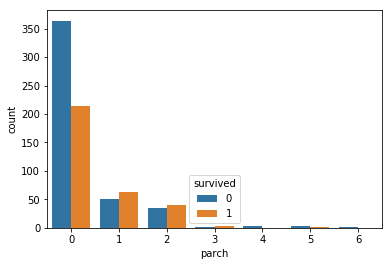

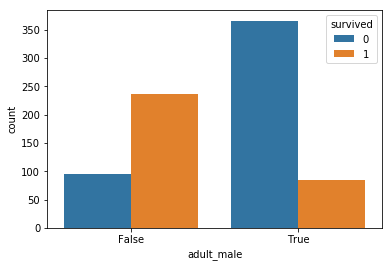

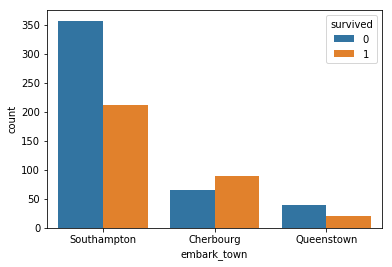

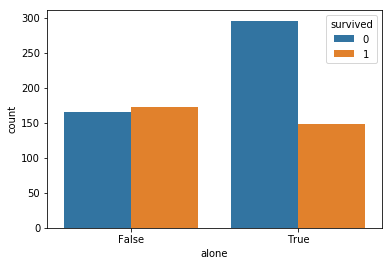

In [40]:
for i in categorical:
    if i!='survived':
        sb.countplot(x=i,hue='survived',data=df)
        plt.show()

### Figure 1: from the figure we can say that Class 3 is very dangerous.There is 50% of survival chance in class 2 and class 1 is much safer compare to other two.
### figure 2: Its very clear that survival rate is very low for male. And if a girl is travelling there is a more chance that he live.
### figure 3:Survival chance of person travelling with no siblings or spouse  is very less compare to the person travelling with 1 spouse or sibling.
### figure 4: Gives the similar information what figure 3 gave us.
### figure 5: Its shows adult male has very high chance of being dead.
### figure 6: Cherbourg people has more chance of suvival than Queenstown and Southampton.
### figure 7:We can say that equal amount of people died when they were on board with their family.

C:\Users\Lenovo\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


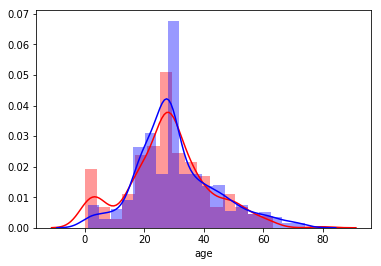

In [42]:
sb.distplot(df['age'][df['survived']==1],color='red')
sb.distplot(df['age'][df['survived']==0],color='blue')
plt.show()

### On this graph we can see both features almost overlap. We cannot drop this feature.lets see how age will effect the gender.

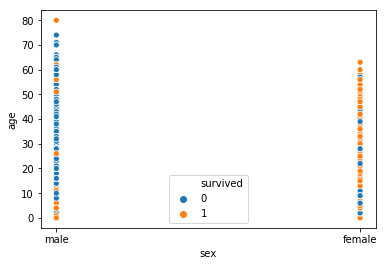

In [45]:
sb.scatterplot(x='sex',y='age',hue='survived',data=df)
plt.show()

### From this graph we can get lot of information. If a boy aged between 0- 5 all survived likewise if a women aged 50+ almost everyone survived.

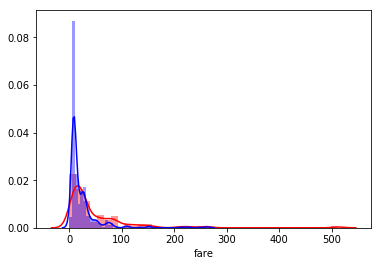

In [43]:
sb.distplot(df['fare'][df['survived']==1],color='red')
sb.distplot(df['fare'][df['survived']==0],color='blue')
plt.show()

### When the fare was between 0-20 many people died. For rest of the time features overlap.

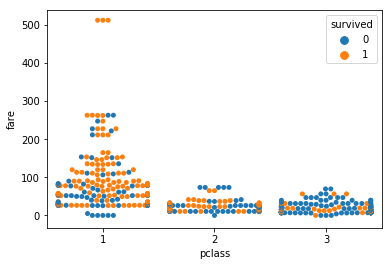

In [51]:
sb.swarmplot(x='pclass',y='fare',hue='survived',data=df)
plt.show()

### We can say that in class 1 when the fare was 80+ survival chance is much. All 3 passenger whos fare was 500+ in class1 survived.

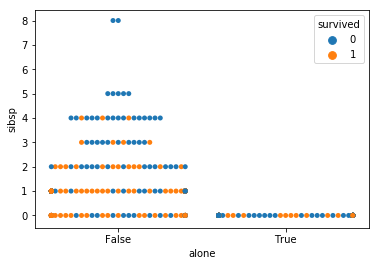

In [52]:
sb.swarmplot(x='alone',y='sibsp',hue='survived',data=df)
plt.show()

### It looks like a person travelling with 3 or more siblings or spouses more chance that he or she will die.

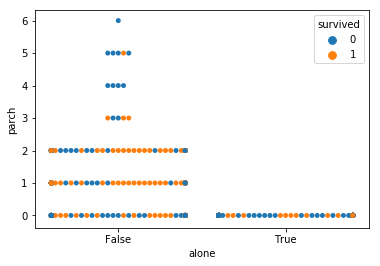

In [53]:
sb.swarmplot(x='alone',y='parch',hue='survived',data=df)
plt.show()

### We can see that if person is alone survival chance is less. But also we can conclude that a person with 1 or 2 children/parents his or her survival rate is more.

In [54]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'adult_male', 'embark_town', 'alone'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder

### Divide the DataFrame into dependent and independent attributes.

In [57]:
x=df.drop('survived',axis=1)
y=df['survived']

In [58]:
x.head()

,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,3,male,22,1,0,7.2500,True,Southampton,False
1,1,female,38,1,0,71.2833,False,Cherbourg,False
2,3,female,26,0,0,7.9250,False,Southampton,True
3,1,female,35,1,0,53.1000,False,Southampton,False
4,3,male,35,0,0,8.0500,True,Southampton,True


In [19]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [59]:
L1=LabelEncoder()
L2=LabelEncoder()
L3=LabelEncoder()
L4=LabelEncoder()

### Algorithm works only on numeric values. So we need to translate or convert these object values to equivalent numeric values

In [60]:
x['sex']=L1.fit_transform(x['sex'])
x['adult_male']=L2.fit_transform(x['adult_male'])
x['embark_town']=L3.fit_transform(x['embark_town'])
x['alone']=L4.fit_transform(x['alone'])

In [61]:
x.head()

,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,3,1,22,1,0,7.2500,1,2,0
1,1,0,38,1,0,71.2833,0,0,0
2,3,0,26,0,0,7.9250,0,2,1
3,1,0,35,1,0,53.1000,0,2,0
4,3,1,35,0,0,8.0500,1,2,1


### Divide the data into training and testing.

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7)

C:\Users\Lenovo\python\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:
xtrain.shape

(547, 9)

In [33]:
ytrain.shape

(547,)

In [34]:
ytest.shape

(235,)

In [35]:
xtest.shape

(235, 9)

### Since we need to predict whether a person can survive or not. We can use decision tree or random forest. But I will use 2 class logistic regression.

In [62]:
from sklearn.linear_model import LogisticRegression
algo=LogisticRegression()

In [65]:
algo.fit(xtrain,ytrain)

C:\Users\Lenovo\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
ypred=algo.predict(xtest)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score
matrix=confusion_matrix(ytest,ypred)
matrix

array([[114,  13],
       [ 28,  80]], dtype=int64)

### Lets understand this confusion matrix
### array[0][0] which is 114 this value tells that our algorithm predicted positive value(survived) and they are True.
### array[1][1] which is 80 this value tells that our algorithm predicted negative value(not survived) and they are True.
### array[0][1] which is 13 this value tells that our algorithm predicted positive value but they are wrong.
### array[1][0] which is 28 this value tells that our algorithm predicted negative value but they are wrong.

In [74]:
accuracy_score(ytest,ypred)

0.825531914893617

### This model gives 82% of accuracy.

In [77]:
import joblib

In [78]:
joblib.dump(algo,r"C:\Users\Lenovo\internship\algo\titanic-model.pkl")

['C:\\Users\\Lenovo\\internship\\algo\\titanic-model.pkl']

In [79]:
joblib.dump(L1,r"C:\Users\Lenovo\internship\algo\titanic-model-l1.pkl")
joblib.dump(L2,r"C:\Users\Lenovo\internship\algo\titanic-model-l2.pkl")
joblib.dump(L3,r"C:\Users\Lenovo\internship\algo\titanic-model-l3.pkl")
joblib.dump(L4,r"C:\Users\Lenovo\internship\algo\titanic-model-l4.pkl")

['C:\\Users\\Lenovo\\internship\\algo\\titanic-model-l4.pkl']